In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [97]:
df = pd.read_csv("./sonar.csv", header=None)
df[60] = np.where(df[60] == 'R', 1, 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [98]:
num_cols = [_ for _ in range(60)]
target_cols = 60

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df[num_cols])
df_ = pd.DataFrame(data)
df_[60] = df[60]
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947,1
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852,1
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582,1
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640,1
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375,1


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = np.array(df_.drop(columns=[target_cols]))
y = np.array(df_[target_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

rf = RandomForestClassifier(
    random_state=42, 
    n_estimators=100,
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1
)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Точность на train наборе данных:", rf.score(X_train, y_train))
print("Точность на test наборе данных:", rf.score(X_test, y_test))

from sklearn.metrics import precision_score, recall_score, f1_score

f_score = f1_score(y_train, y_pred_train)
recall_value = recall_score(y_train, y_pred_train)
precision_value = precision_score(y_train, y_pred_train)
print(f"train:")
print(f"F-мера: {f_score}")
print(f"Полнота (recall): {recall_value}")
print(f"Точность (precision): {precision_value}\n")
f_score = f1_score(y_test, y_pred_test)
recall_value = recall_score(y_test, y_pred_test)
precision_value = precision_score(y_test, y_pred_test)
print(f"test:")
print(f"F-мера: {f_score}")
print(f"Полнота (recall): {recall_value}")
print(f"Точность (precision): {precision_value}")


Точность на train наборе данных: 1.0
Точность на test наборе данных: 0.8571428571428571
train:
F-мера: 1.0
Полнота (recall): 1.0
Точность (precision): 1.0

test:
F-мера: 0.823529411764706
Полнота (recall): 0.875
Точность (precision): 0.7777777777777778


In [107]:
def softmax(a):
    e_a = np.exp(a)
    return e_a / np.sum(e_a, axis=1, keepdims=True) 

class NN: 
    
    def __init__(self, input_size=60, layer_size=500, output_size=2):
        np.random.seed(0)
        model = {}
        model['w1'] = np.random.randn(input_size, layer_size)
        model['b1'] = np.zeros((1, layer_size))
        model['w2'] = np.random.randn(layer_size, output_size)
        model['b2'] = np.zeros((1, output_size))
        self.model = model
        
    def forward(self, X):
        z1 = np.dot(X, self.model['w1']) + self.model['b1']
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1, self.model['w2']) + self.model['b2']
        y_ = softmax(z2)
        self.activation_outputs = (a1, y_)
        
        return y_
    
    def backward(self, X, y, learning_rate = 0.01):
        w1, w2 = self.model['w1'], self.model['w2']
        b1, b2 = self.model['b1'], self.model['b2']
        m = X.shape[0]
        a1, y_ = self.activation_outputs
        
        delta2 = y_ - y
        dw2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)/float(m)
        
        delta1 = (1 - np.square(a1)) * np.dot(delta2, w2.T)
        dw1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)/float(m)
        
        self.model['w1'] -= learning_rate * dw1 / m
        self.model['b1'] -= learning_rate * db1
        
        self.model['w2'] -= learning_rate * dw2 / m
        self.model['b2'] -= learning_rate * db2
        
    def predict(self, X):
        y_out = self.forward(X)
        return np.argmax(y_out, axis=1)
    
def accuracy(y_out, y_):
    y_out = [np.argmax(y) for y in y_out]
    y_ = [np.argmax(y) for y in y_]
    acc = [1 for i in range(len(y_)) if y_[i] == y_out[i]]
    return len(acc) / len(y_)
        
def loss(y_out, y_):
    return -np.mean(y_out * np.log(y_))

def one_hot(y, depth):
    m = y.shape[0]
    y_out = np.zeros((m, depth))
    y_out[np.arange(m), y] = 1
    return y_out

def train(X, y, model, epochs, learning_rate=0.01, logs=True):
    training_loss = []
    training_accuracy = []
    classes = 2
    y_out = one_hot(y, classes)
    for e in range(epochs):
        y_ = model.forward(X)
        model.backward(X, y_out, learning_rate)
        l = loss(y_out, y_)
        a = accuracy(y_out, y_)
        training_loss.append(l)
        training_accuracy.append(a)
        if logs:
            print(f"eposh #{e} loss: {l} acc: {a}")
    return (training_loss, training_accuracy)

In [108]:
model = NN(layer_size=2000)
loss_history, acc_history = train(X_train, y_train, model, 6, learning_rate=0.5)

eposh #0 loss: 9.768309825265074 acc: 0.5060240963855421
eposh #1 loss: 5.394152797824695 acc: 0.7891566265060241
eposh #2 loss: 0.9677916305902301 acc: 0.9216867469879518
eposh #3 loss: 0.4766727468628695 acc: 0.9337349397590361
eposh #4 loss: 0.03458082446745306 acc: 0.9879518072289156
eposh #5 loss: 2.0738304002795186e-11 acc: 1.0


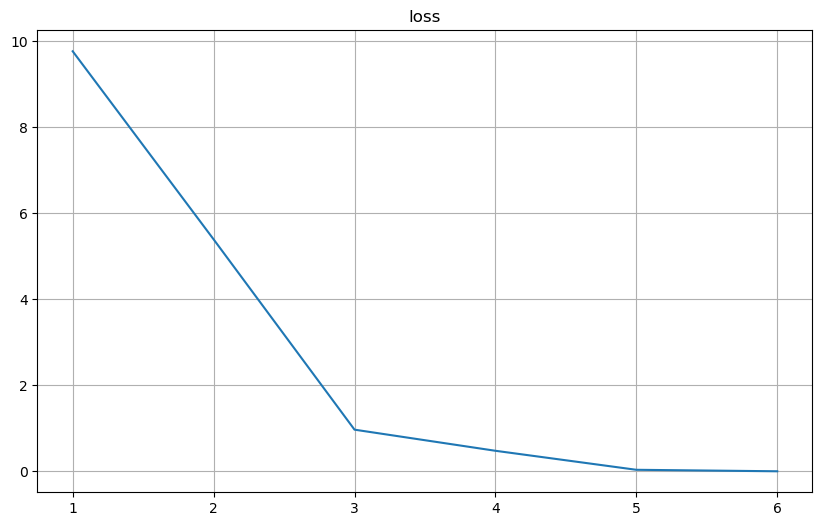

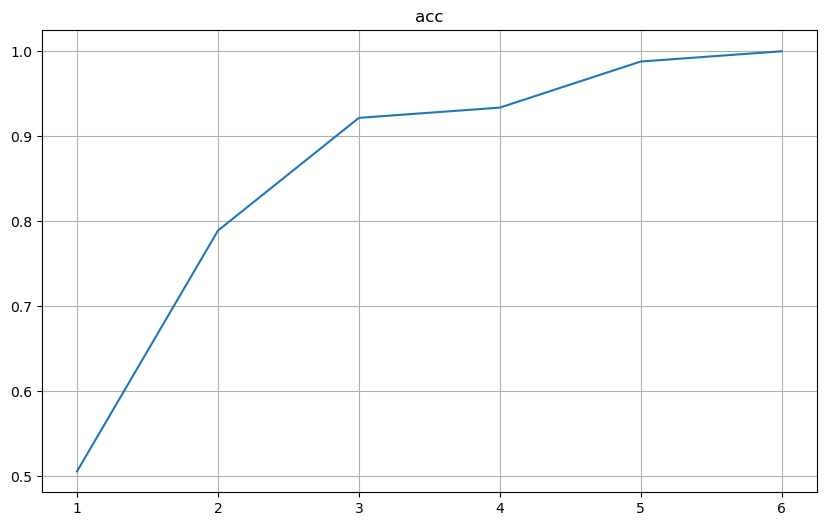

In [109]:
plt.figure(figsize=(10, 6))
plt.title("loss")
plt.grid()
n_train_examples = np.arange(1, len(loss_history) + 1)
plt.plot(n_train_examples, loss_history)
plt.show()

plt.figure(figsize=(10, 6))
plt.title("acc")
plt.grid()
n_train_examples = np.arange(1, len(acc_history) + 1)
plt.plot(n_train_examples, acc_history)
plt.show()

In [110]:
def cool_accuracy(y_out, y_):
    acc = [1 for i in range(len(y_)) if y_[i] == y_out[i]]
    return len(acc) / len(y_)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Точность на train наборе данных:", cool_accuracy(y_train, y_pred_train))
print("Точность на test наборе данных:", cool_accuracy(y_test, y_pred_test))
print()

from sklearn.metrics import precision_score, recall_score, f1_score

f_score = f1_score(y_train, y_pred_train)
recall_value = recall_score(y_train, y_pred_train)
precision_value = precision_score(y_train, y_pred_train)
print(f"train:")
print(f"F-мера: {f_score}")
print(f"Полнота (recall): {recall_value}")
print(f"Точность (precision): {precision_value}\n")
f_score = f1_score(y_test, y_pred_test)
recall_value = recall_score(y_test, y_pred_test)
precision_value = precision_score(y_test, y_pred_test)
print(f"test:")
print(f"F-мера: {f_score}")
print(f"Полнота (recall): {recall_value}")
print(f"Точность (precision): {precision_value}")

Точность на train наборе данных: 1.0
Точность на test наборе данных: 0.7857142857142857

train:
F-мера: 1.0
Полнота (recall): 1.0
Точность (precision): 1.0

test:
F-мера: 0.742857142857143
Полнота (recall): 0.8125
Точность (precision): 0.6842105263157895
